## Work
1. 試改變 monitor "Validation Accuracy" 並比較結果
2. 調整 earlystop 的等待次數至 10, 25 並比較結果

In [1]:
import os
import keras
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from keras.layers import BatchNormalization

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 1024
MOMENTUM = 0.95

In [7]:
# 載入 Callbacks
"""Code Here
設定 callbacks: Earlystop
"""
from keras.callbacks import EarlyStopping

In [8]:
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
results = {}

In [9]:
monitor_setting = "val_loss"

patience_list = [10,25]
for patience in patience_list:
    earlystop = EarlyStopping(monitor=monitor_setting, 
                              patience= patience, 
                              verbose=1
                              )

    model = build_mlp(input_shape=x_train.shape[1:])
    # model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    results['monitor={0}, patience={1}'.format(monitor_setting, patience)] = {
        'loss':train_loss,'val_loss':valid_loss,'accuracy':train_acc,'val_accuracy':valid_acc }

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 58us/step - loss: 2.1928 - accuracy: 0.2747 - val_loss: 2.1111 - val_accuracy: 0.2316
Epoch 2/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.7407 - accuracy: 0.3937 - val_loss: 1.9578 - val_accuracy: 0.3044
Epoch 3/50
50000/50000 [==============================] - 2s 43us/step - loss: 1.6090 - accuracy: 0.4362 - val_loss: 1.8295 - val_accuracy: 0.3657
Epoch 4/50
50000/50000 [==============================] - 2s 50us/step - loss: 1.5373 - accuracy: 0.4601 - val_loss: 1.7294 - val_accuracy: 0.4020
Epoch 5/50
50000/50000 [==============================] - 2s 47us/step - loss: 1.4806 - accuracy: 0.4833 - val_loss: 1.6472 - val_accuracy: 0.4241
Epoch 6/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4357 - accuracy: 0.4977 - val_loss: 1.5830 - val_accuracy: 0.4479
Epoch 7/50
50000/50000 [==============================] - 2s 47us/st

50000/50000 [==============================] - 2s 46us/step - loss: 0.9639 - accuracy: 0.6763 - val_loss: 1.4636 - val_accuracy: 0.4999
Epoch 25/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.9427 - accuracy: 0.6848 - val_loss: 1.4690 - val_accuracy: 0.4996
Epoch 26/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.9224 - accuracy: 0.6927 - val_loss: 1.4705 - val_accuracy: 0.4978
Epoch 27/50
50000/50000 [==============================] - 2s 47us/step - loss: 0.9015 - accuracy: 0.7013 - val_loss: 1.4877 - val_accuracy: 0.4945
Epoch 28/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.8826 - accuracy: 0.7067 - val_loss: 1.4763 - val_accuracy: 0.4943
Epoch 29/50
50000/50000 [==============================] - 2s 46us/step - loss: 0.8627 - accuracy: 0.7149 - val_loss: 1.4765 - val_accuracy: 0.5029
Epoch 30/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.8423 - accuracy: 0.7238 - val_loss: 1.4844

In [10]:
monitor_setting = "val_accuracy"

patience_list = [10,25]
for patience in patience_list:
    earlystop = EarlyStopping(monitor=monitor_setting, 
                              patience= patience, 
                              verbose=1
                              )

    model = build_mlp(input_shape=x_train.shape[1:])
    # model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)
    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True,
              callbacks=[earlystop]
             )

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]

    results['monitor={0}, patience={1}'.format(monitor_setting, patience)] = {
        'loss':train_loss,'val_loss':valid_loss,'accuracy':train_acc,'val_accuracy':valid_acc }

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 3s 53us/step - loss: 2.2408 - accuracy: 0.2675 - val_loss: 2.1400 - val_accuracy: 0.2032
Epoch 2/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.7367 - accuracy: 0.3971 - val_loss: 1.9731 - val_accuracy: 0.2982
Epoch 3/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.6094 - accuracy: 0.4390 - val_loss: 1.8226 - val_accuracy: 0.3594
Epoch 4/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.5354 - accuracy: 0.4657 - val_loss: 1.7243 - val_accuracy: 0.3919
Epoch 5/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.4803 - accuracy: 0.4859 - val_loss: 1.6329 - val_accuracy: 0.4195
Epoch 6/50
50000/50000 [==============================] - 2s 46us/step - loss: 1.4355 - accuracy: 0.5009 - val_loss: 1.5735 - val_accuracy: 0.4477
Epoch 7/50
50000/50000 [==============================] - 2s 46us/st

50000/50000 [==============================] - 2s 45us/step - loss: 1.0852 - accuracy: 0.6306 - val_loss: 1.4633 - val_accuracy: 0.4916
Epoch 20/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.0631 - accuracy: 0.6392 - val_loss: 1.4603 - val_accuracy: 0.4928
Epoch 21/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.0401 - accuracy: 0.6482 - val_loss: 1.4642 - val_accuracy: 0.4950
Epoch 22/50
50000/50000 [==============================] - 2s 45us/step - loss: 1.0193 - accuracy: 0.6557 - val_loss: 1.4645 - val_accuracy: 0.4935
Epoch 23/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.9986 - accuracy: 0.6645 - val_loss: 1.4673 - val_accuracy: 0.4950
Epoch 24/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.9775 - accuracy: 0.6717 - val_loss: 1.4709 - val_accuracy: 0.4962
Epoch 25/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.9585 - accuracy: 0.6788 - val_loss: 1.4662

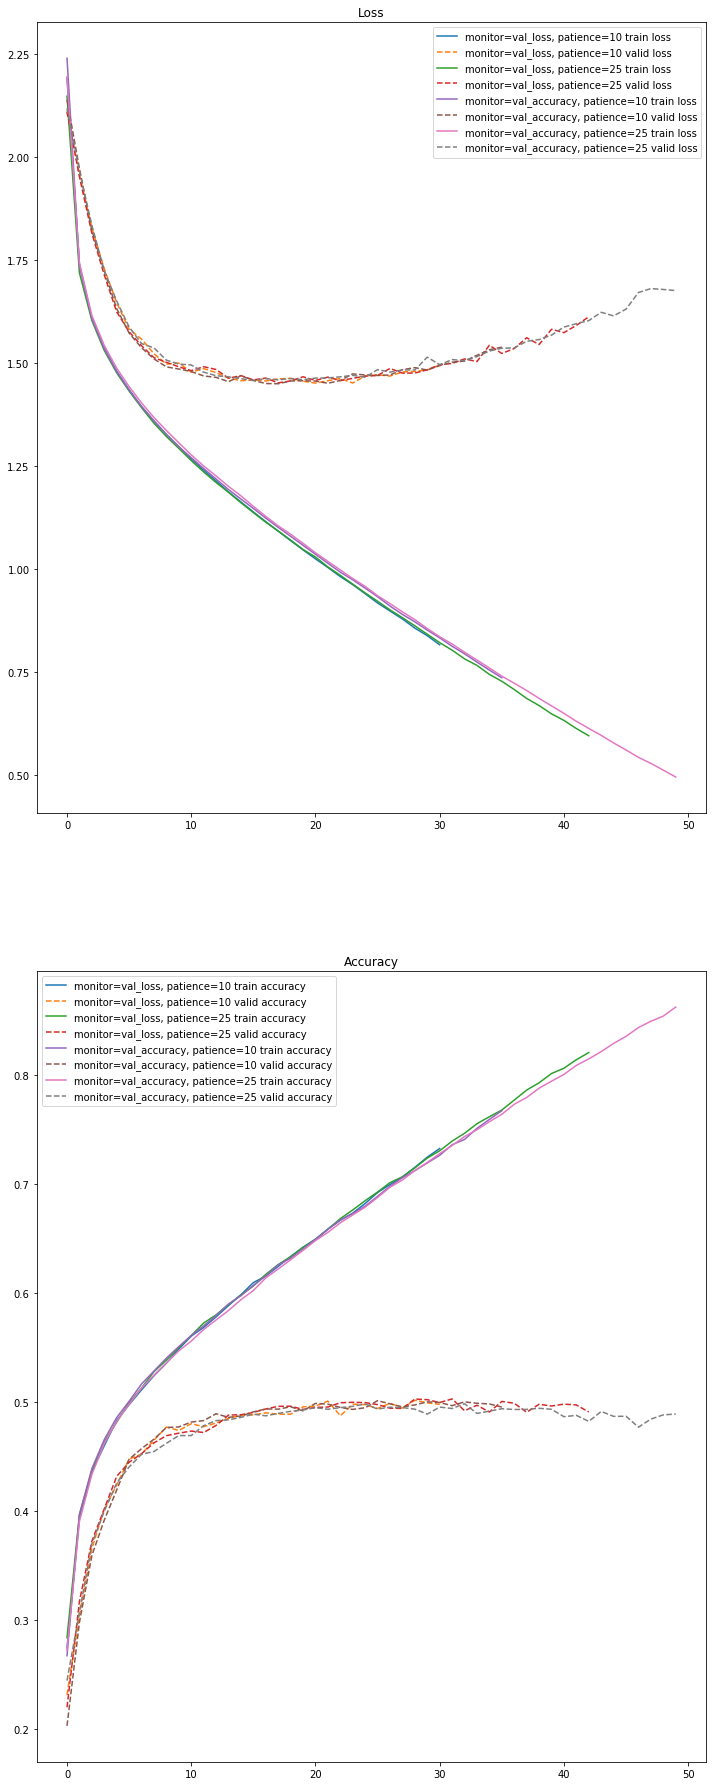

In [15]:

"""Code Here
將結果繪出
"""
plt.figure(figsize=(12,32))
for title,res in results.items():
    train_loss = res["loss"]
    valid_loss = res["val_loss"]    
    plt.subplot(2,1,1)
    plt.plot(range(len(train_loss)), train_loss,'-', label=title+" train loss")
    plt.plot(range(len(valid_loss)), valid_loss,'--', label=title+" valid loss")
    plt.legend()
    plt.title("Loss")
for title,res in results.items():
    train_acc = res["accuracy"]
    valid_acc = res["val_accuracy"]  
    plt.subplot(2,1,2)
    plt.plot(range(len(train_acc)), train_acc,'-', label=title +" train accuracy")
    plt.plot(range(len(valid_acc)), valid_acc,'--', label=title +" valid accuracy")
    plt.legend()
    plt.title("Accuracy")
plt.show()